## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Installing Required Libraries </div> 

In [1]:
!pip install kaggle
!pip install zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div>

In [1]:
import pandas as pd      # pandas for data manipulation and analysis
import numpy as np       # numpy for numerical computing
import seaborn as sns    # seaborn for statistical data visualization
import matplotlib.pyplot as plt    # matplotlib for creating static visualizations

# import zipfile library (we will use this to extract the file downloaded from Kaggle)
import zipfile

# import kaggle library (we will use this to download the dataset programatically from Kaggle)
import kaggle

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Loading Dataset From kaggle API </div> 

In [2]:
# download dataset from kaggle using the Kaggle API
#!kaggle datasets download -d username/dataset name
!kaggle datasets download -d laotse/credit-risk-dataset


  0%|          | 0.00/368k [00:00<?, ?B/s]
100%|##########| 368k/368k [00:00<00:00, 386kB/s]
100%|##########| 368k/368k [00:00<00:00, 386kB/s]


In [3]:
# extract the file from the downloaded zip file
zipfile_name = 'credit-risk-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
## Reading the data into the DataFrame
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Data Wrangling </div> 

#### 1. Computing Dimension of Dataset

In [5]:
#shape of data
print("dataset shape: ",df.shape)

dataset shape:  (32581, 12)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **32581 records** and **12 columns** availabe in the dataset.

#### 2. Statistical Summary of Dataset

In [6]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 8 Numerical Columns in dataset
There are 4 Categorical Columns in dataset


No data type conversion needed for the provided dataset as the data types seem appropriate for each column.

#### 3. Random Sample of dataset with only Numerical Feature 

In [8]:
df.select_dtypes(np.number).sample(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
17517,22,74000,4.0,5050,5.42,0,0.07,4
17348,21,70553,2.0,10000,15.28,1,0.12,3
6339,22,30000,7.0,6000,14.79,1,0.20,4
6219,21,48000,5.0,10800,12.84,0,0.23,2
20989,28,51996,1.0,5000,NaN,0,0.10,6


#### 4. Random Sample of dataset with only categorical Feature

In [9]:
df.select_dtypes(include='O').sample(5)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
22076,RENT,EDUCATION,D,Y
12853,MORTGAGE,HOMEIMPROVEMENT,A,N
9707,RENT,VENTURE,C,N
2472,MORTGAGE,EDUCATION,B,N
25591,OWN,EDUCATION,C,Y


#### 5. Checking if There's Any Duplicate Records.

In [10]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  165


In [11]:
# Remove duplicates
df = df.drop_duplicates()

#### 6. Computing Total No. of Missing Values and the Percentage of Missing Values

In [12]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
person_age,0,0.00
person_income,0,0.00
person_home_ownership,0,0.00
person_emp_length,887,2.74
loan_intent,0,0.00
loan_grade,0,0.00
loan_amnt,0,0.00
loan_int_rate,3095,9.55
loan_status,0,0.00
loan_percent_income,0,0.00


The 'person_emp_length' and 'loan_int_rate' contains null values.we'll impute missing values using the **median** value of the column as the median is less sensitive to outliers compared to the mean. If there are outliers in the data (e.g., extremely high or low values), using the mean for imputation might skew the imputed values.

In [13]:
# Impute missing values for person_emp_length and loan_int_rate
median_emp_length = df['person_emp_length'].median()
median_loan_int_rate = df['loan_int_rate'].median()

df['person_emp_length'].fillna(median_emp_length, inplace=True)
df['loan_int_rate'].fillna(median_loan_int_rate, inplace=True)

In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### 7. Performing Descriptive Analysis

In [15]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.75,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.64,62015.58,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.77,4.09,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.85,6322.73,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.01,3.08,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.81,4.06,2.00,3.00,4.00,8.00,30.00


#### 8 Performing Descriptive Analysis on Categorical Attributes.

In [16]:
df.describe(include="O").T

,count,unique,top,freq
person_home_ownership,32416,4,RENT,16378
loan_intent,32416,6,EDUCATION,6411
loan_grade,32416,7,A,10703
cb_person_default_on_file,32416,2,N,26686


#### 9. Checking Frequency distribution of Categorical Attributes.

In [17]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Frequency Distribution of ', column,'\n', df[column].value_counts().reset_index())
    print("-"*120)

Frequency Distribution of  person_home_ownership 
   person_home_ownership  count
0                  RENT  16378
1              MORTGAGE  13369
2                   OWN   2563
3                 OTHER    106
------------------------------------------------------------------------------------------------------------------------
Frequency Distribution of  loan_intent 
          loan_intent  count
0          EDUCATION   6411
1            MEDICAL   6042
2            VENTURE   5682
3           PERSONAL   5498
4  DEBTCONSOLIDATION   5189
5    HOMEIMPROVEMENT   3594
------------------------------------------------------------------------------------------------------------------------
Frequency Distribution of  loan_grade 
   loan_grade  count
0          A  10703
1          B  10387
2          C   6438
3          D   3620
4          E    963
5          F    241
6          G     64
-------------------------------------------------------------------------------------------------------------------

In [18]:
columns = ['person_age','person_emp_length']
# Loop through each column and print its value counts
for column in columns:
    print(f"unique Values for column '{column}':")
    print(df[column].unique())
    print("\n")

unique Values for column 'person_age':
[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]


unique Values for column 'person_emp_length':
[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  11.  18.
  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.  25.
  27.  28.  31.  41.  34.  29.  38.  30.]




In [19]:
df[(df['person_age'] >= 123) | (df['person_emp_length']== 123)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


As the Person age and Person employee length greater than 123 is highly impossible these are data erros. so removing the rows from dataset

In [20]:
# Remove rows where either 'person_age' or 'person_emp_length' is equal to 123
df = df[~((df['person_age'] >= 123) | (df['person_emp_length']== 123))]

# Reset index inplace
df.reset_index(drop=True, inplace=True)

#### 10. Saving the Cleaned DataFrame to csv file.

In [21]:
df.to_csv('final.csv', index=False)  # Set index=False to exclude row numbers/index from being saved

### Step 3: Exploratory Data Analysis (EDA)

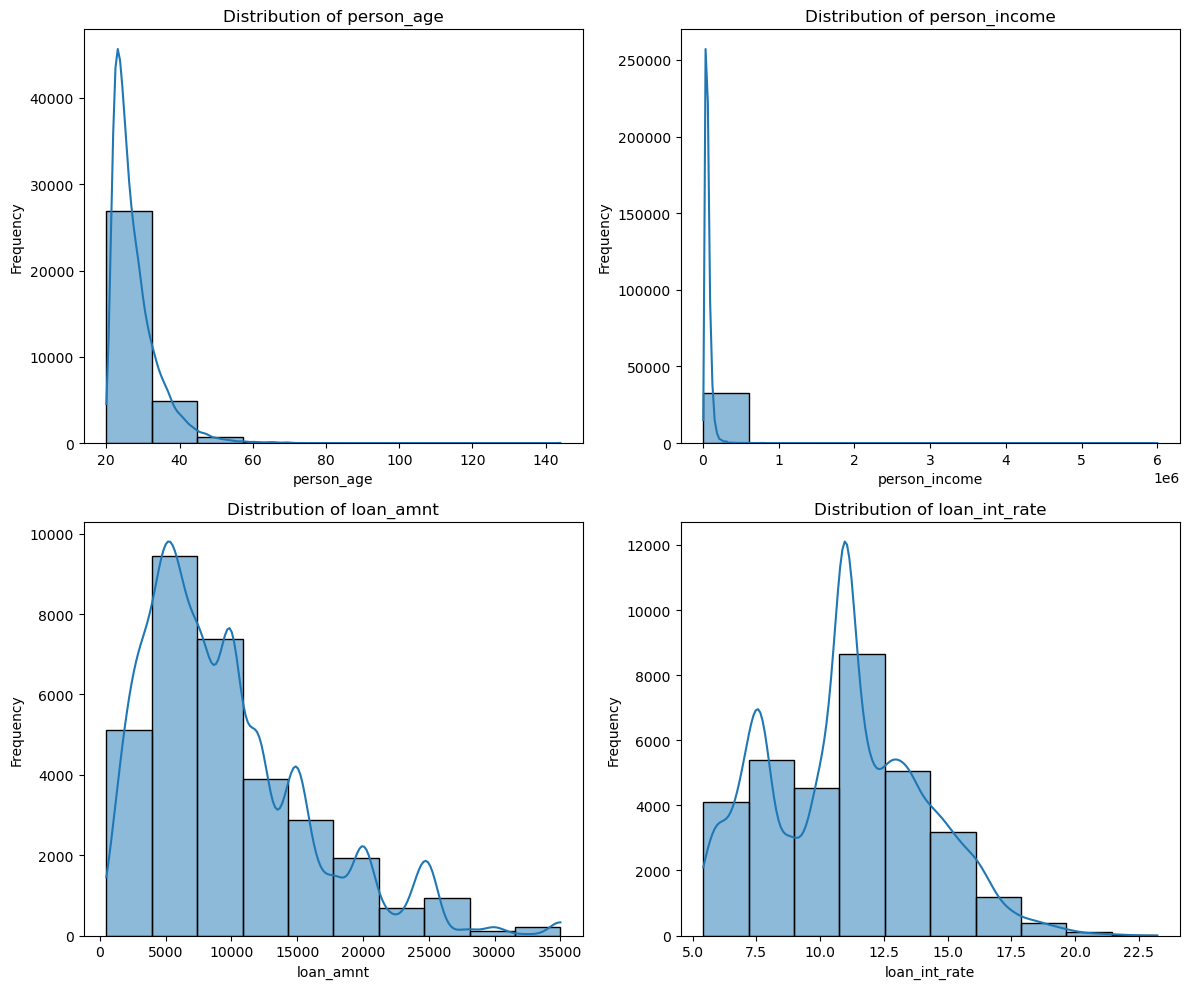

In [16]:
# Define a function to create histograms with dynamic bin edges in a 2x2 grid of subplots
def plot_histograms_with_dynamic_bins_subplots(data, columns, num_bins=10):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 10))

    for i, column_name in enumerate(columns):
        row = i // 2
        col = i % 2
        
        min_value = data[column_name].min()
        max_value = data[column_name].max()
        bin_edges = np.linspace(min_value, max_value, num_bins + 1)

        sns.histplot(data[column_name], bins=bin_edges, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {column_name}')
        axes[row, col].set_xlabel(column_name)
        axes[row, col].set_ylabel('Frequency')

    if num_cols % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.tight_layout()
    plt.show()

# Columns for which histograms are to be plotted
columns_to_plot = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']

# Plot histograms with dynamic bins for each column in a 2x2 grid of subplots
plot_histograms_with_dynamic_bins_subplots(df, columns_to_plot)

Person Age Distribution:
The histogram shows that most individuals fall between the ages of 20 and 40.
There’s a sharp decline in frequency as age increases beyond 40.
Person Income Distribution:
The majority of people have low incomes, as indicated by the steep drop in frequency as income rises.
The x-axis spans from near zero to over five million.
Loan Amount Distribution:
Peaks around $5000, $10000, and $15000 suggest common loan amounts.
Fewer loans are significantly lower or higher than these peaks.
Loan Interest Rate Distribution:
Most loans have interest rates around 7.5% to 10%, with another peak at around 15%.
Interest rates outside this range are less frequent.

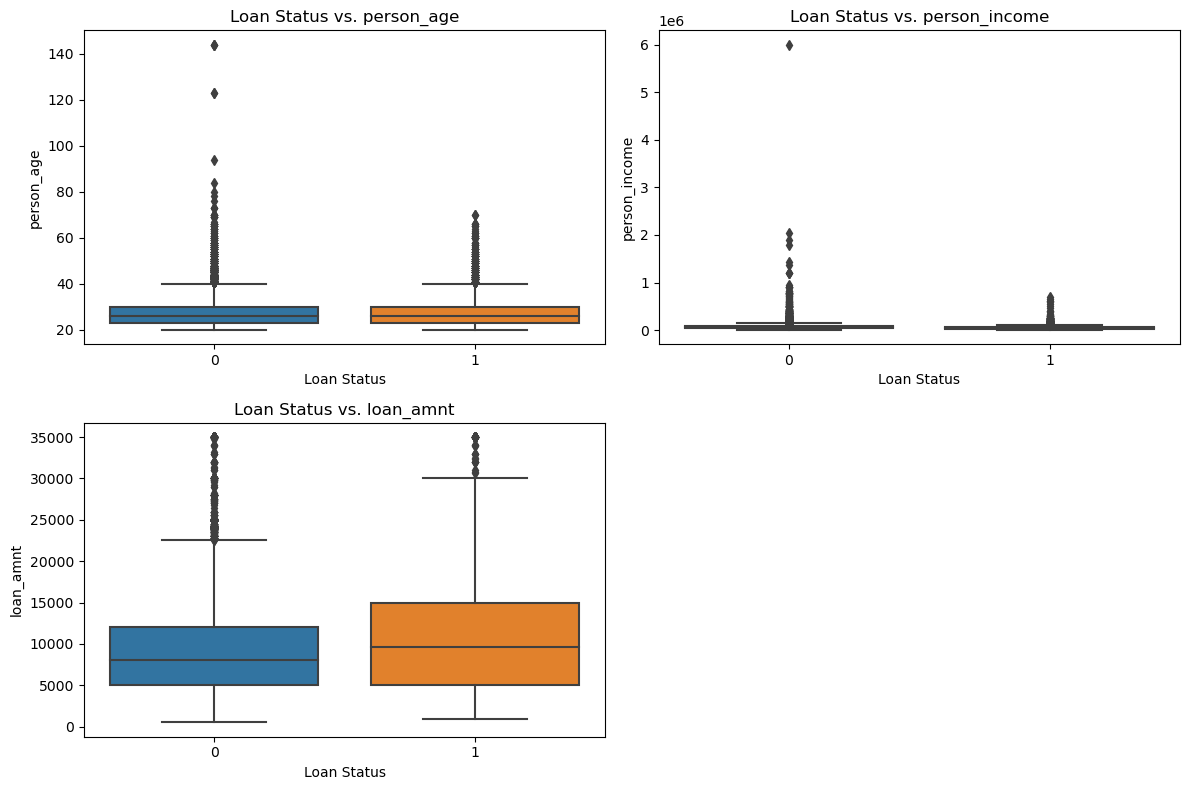

In [39]:
# Define a function to create subplots for boxplots
def plot_boxplots_subplots(data, columns):
    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))

    for i, column_name in enumerate(columns):
        row = i // 2
        col = i % 2

        sns.boxplot(x='loan_status', y=column_name, data=data, ax=axes[row, col])
        axes[row, col].set_title(f'Loan Status vs. {column_name}')
        axes[row, col].set_xlabel('Loan Status')
        axes[row, col].set_ylabel(column_name)

    if num_plots % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.tight_layout()
    plt.show()

# Columns for which boxplots are to be plotted
columns_to_plot = ['person_age', 'person_income', 'loan_amnt']

# Plot boxplots for each column in subplots
plot_boxplots_subplots(df, columns_to_plot)

Loan Status vs. Person Age:
People with a loan status of 0 tend to be younger, with a lower median age compared to those with a loan status of 1.
There are outliers in both categories, suggesting some individuals with extreme ages.
Loan Status vs. Person Income:
The income distribution is similar for both loan statuses, but there are more high-income outliers for loan status 0.
This implies that while the median income is comparable, there are wealthier individuals among those without loans.
Loan Status vs. Loan Amount:
Individuals with a loan status of 1 tend to have higher median loan amounts.
The interquartile range (IQR) for loan amount is wider for loan status 1, indicating greater variability in the amounts borrowed.

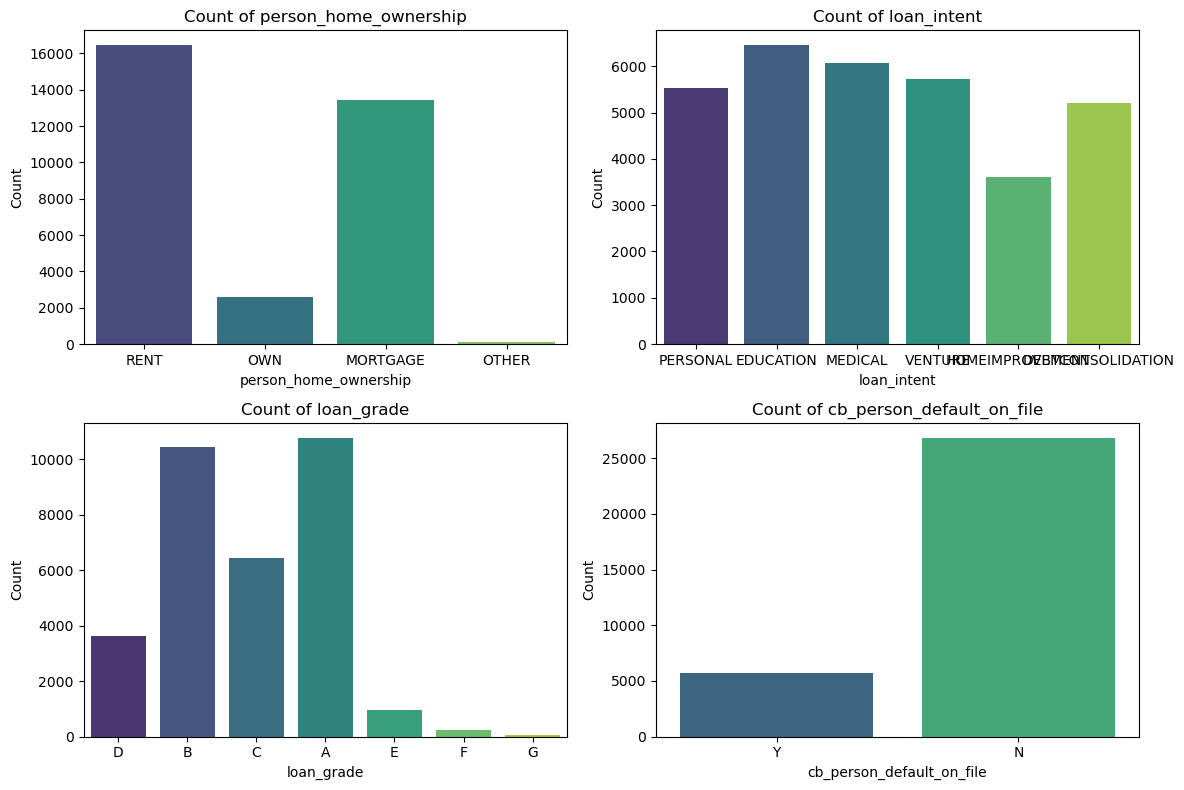

In [42]:
# Define a function to create subplots for countplots
def plot_countplots_subplots(data, columns,palette='viridis'):
    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))

    for i, column_name in enumerate(columns):
        row = i // 2
        col = i % 2

        sns.countplot(x=column_name, data=data, ax=axes[row, col],palette='viridis')
        axes[row, col].set_title(f'Count of {column_name}')
        axes[row, col].set_xlabel(column_name)
        axes[row, col].set_ylabel('Count')

    if num_plots % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.tight_layout()
    plt.show()

# Columns for which countplots are to be plotted
columns_to_plot = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Plot countplots for each column in subplots
plot_countplots_subplots(df, columns_to_plot,palette='viridis')

Home Ownership Distribution:
The top-left graph shows the distribution of home ownership among a population.
Categories: RENT, OWN, MORTGAGE, and OTHER.
Most people in this dataset are renting, followed by those who own their homes, have a mortgage, or fall into the other category.
Loan Intent Distribution:
The top-right graph indicates the intent or reason for taking out a loan.
Categories: PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, and DEBTCONSOLIDATION.
The majority of loans were taken out for personal reasons and debt consolidation.
Loan Grade Distribution:
The bottom-left graph represents the grades assigned to loans based on their risk or quality.
Categories range from D to G (it’s unclear if A-C are excluded intentionally or not present due to scale).
Most loans fall under grade D and grade B.
Default on File Distribution:
The bottom-right graph shows whether individuals have a default on file.
Categories: Y (Yes) and N (No).
A significant majority do not have a default on file.

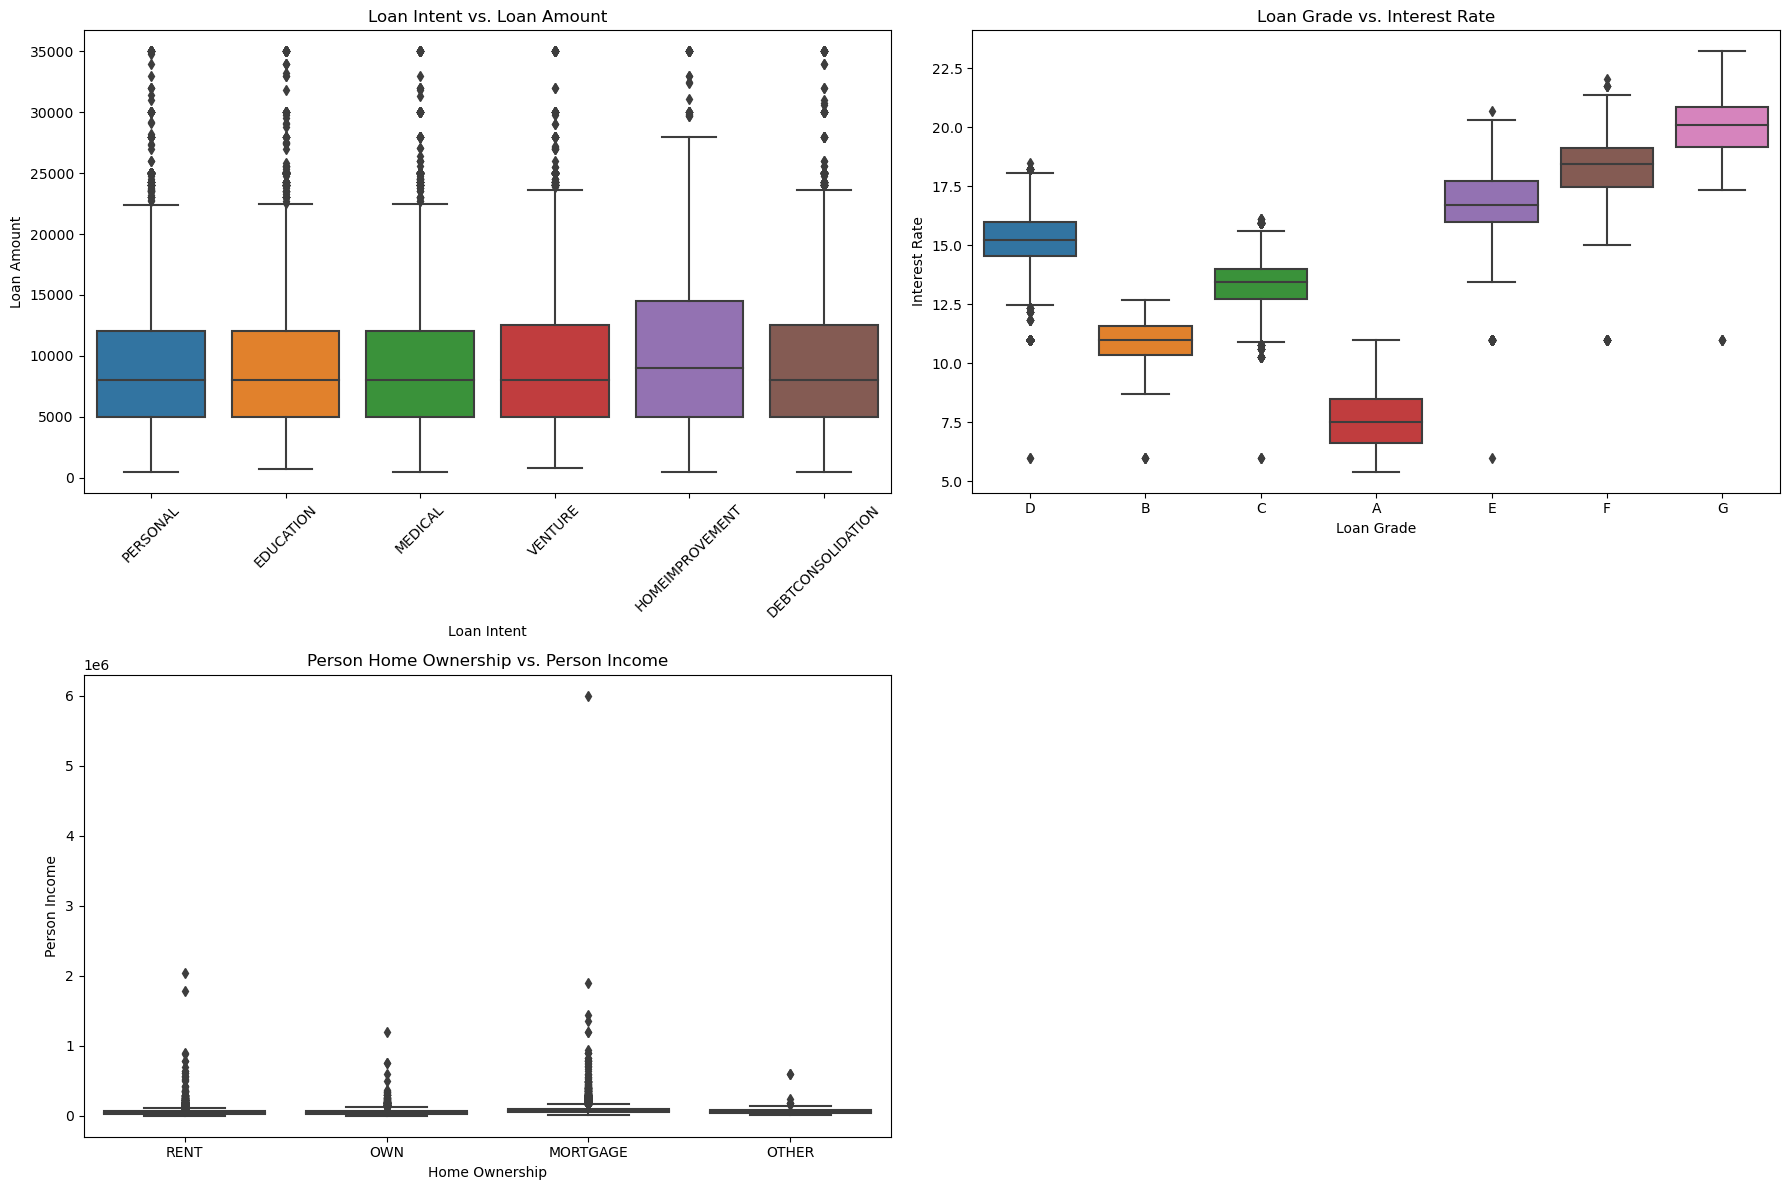

In [43]:
plt.figure(figsize=(18, 12))

# Relationship between Loan Intent and Loan Amount
plt.subplot(2, 2, 1)
sns.boxplot(x='loan_intent', y='loan_amnt', data=df)
plt.title('Loan Intent vs. Loan Amount')
plt.xlabel('Loan Intent')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)

# Relationship between Loan Grade and Interest Rate
plt.subplot(2, 2, 2)
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df)
plt.title('Loan Grade vs. Interest Rate')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')

# Relationship between Person Home Ownership and Person Income
plt.subplot(2, 2, 3)
sns.boxplot(x='person_home_ownership', y='person_income', data=df)
plt.title('Person Home Ownership vs. Person Income')
plt.xlabel('Home Ownership')
plt.ylabel('Person Income')

plt.tight_layout()
plt.show()

Loan Intent vs. Loan Amount:
This graph compares different loan intents with their corresponding loan amounts.
Categories: DEBTCONSOLIDATION, EDUCATION, HOMEIMPROVEMENT, MEDICAL, PERSONAL, and VENTURE.
Each category is represented by a colored box plot showing the distribution of loan amounts for that particular intent.
The median loan amount varies across intents, with DEBTCONSOLIDATION having the highest median loan amount.
Loan Grade vs. Interest Rate:
This graph shows the relationship between loan grades (A through G) and interest rates.
Each grade is represented by a different colored box plot indicating the range and median interest rate for loans of that grade.
Grade A has the lowest median interest rate, while Grade G has the highest.
Person Home Ownership vs. Person Income:
This graph illustrates the income distribution among four types of home ownership: RENT, OWN, MORTGAGE, and OTHER.
It uses box plots to show income distribution for each category of home ownership.
MORTGAGE has the highest median income, followed by OWN and RENT.

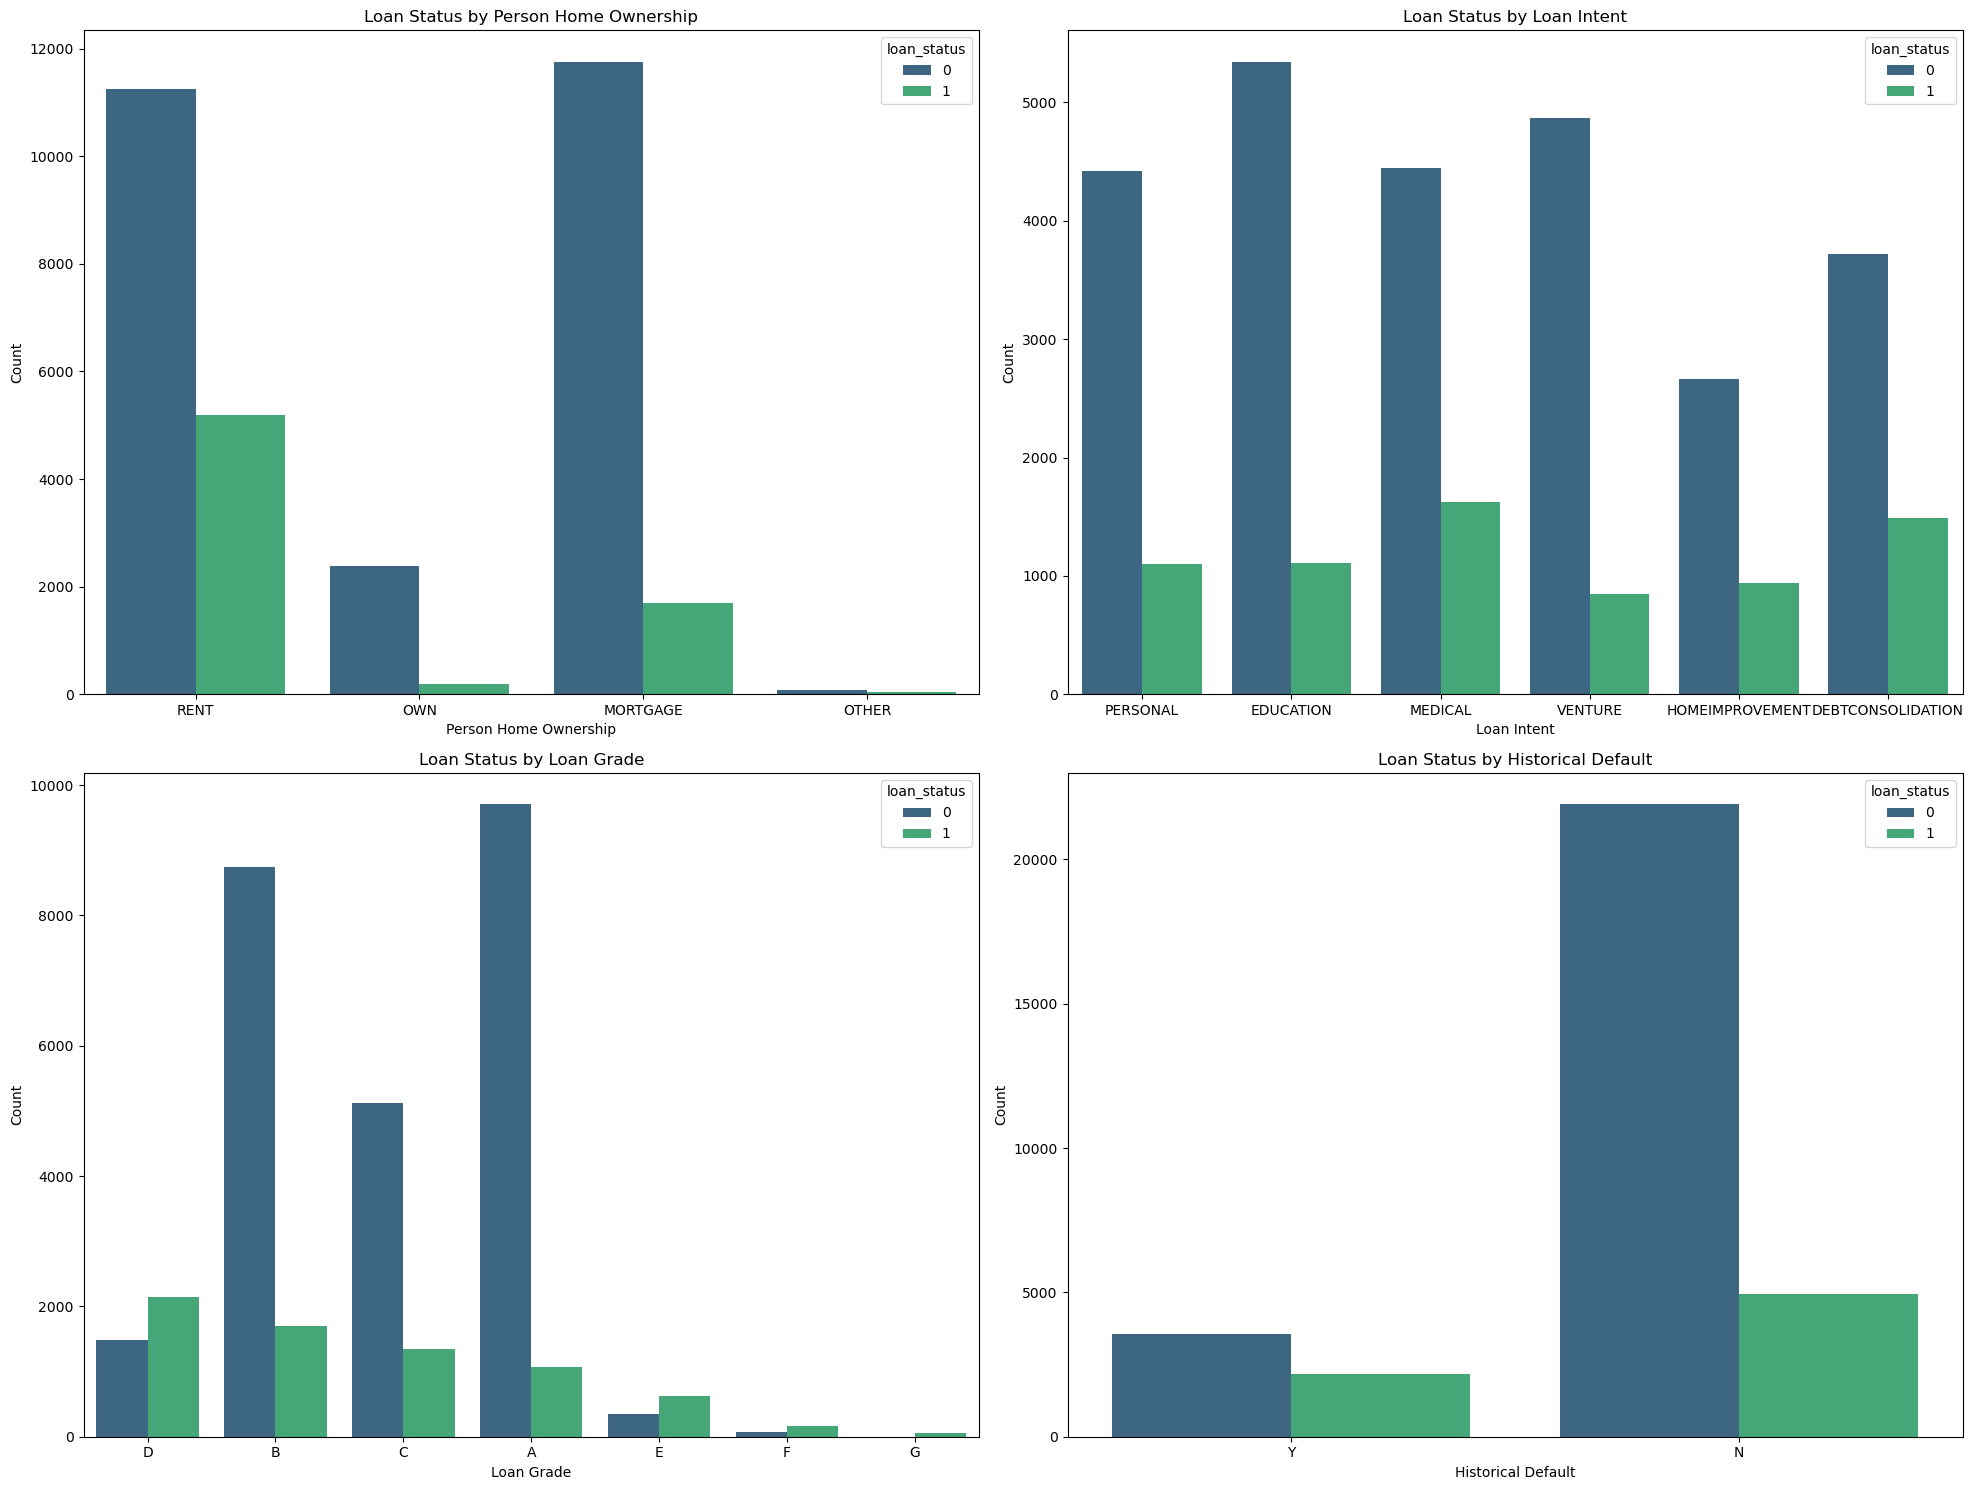

In [45]:
# Additional EDA on categorical columns with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(ax=axes[0, 0], x='person_home_ownership', hue='loan_status', data=df, palette='viridis')
axes[0, 0].set_title('Loan Status by Person Home Ownership')
axes[0, 0].set_xlabel('Person Home Ownership')
axes[0, 0].set_ylabel('Count')

sns.countplot(ax=axes[0, 1], x='loan_intent', hue='loan_status', data=df, palette='viridis')
axes[0, 1].set_title('Loan Status by Loan Intent')
axes[0, 1].set_xlabel('Loan Intent')
axes[0, 1].set_ylabel('Count')

sns.countplot(ax=axes[1, 0], x='loan_grade', hue='loan_status', data=df, palette='viridis')
axes[1, 0].set_title('Loan Status by Loan Grade')
axes[1, 0].set_xlabel('Loan Grade')
axes[1, 0].set_ylabel('Count')

sns.countplot(ax=axes[1, 1], x='cb_person_default_on_file', hue='loan_status', data=df, palette='viridis')
axes[1, 1].set_title('Loan Status by Historical Default')
axes[1, 1].set_xlabel('Historical Default')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Loan Status by Person Home Ownership:
Categories: RENT, OWN, MORTGAGE, OTHER
Most loans are associated with individuals who have a mortgage.
Renters also account for a significant number of loans.
Loans associated with individuals who own their home or fall under the “other” category are relatively few.
Loan Status by Loan Intent:
Categories: PERSONAL, EDUCATION, MEDICAL, VENTURE, HOME IMPROVEMENT, DEBT CONSOLIDATION
Debt consolidation and home improvement are the most common loan intents.
Education and medical intents have similar counts but are significantly lower.
Loan Status by Loan Grade:
Categories: D0-D5 (presumably credit grades)
D3 grade has the highest number of loans, followed by D4 and D5.
D0 has the least number of loans among all grades.
Loan Status vs Historical Default:
Categories: N (No), Y (Yes)
A significant number of loans are associated with individuals who have not historically defaulted.
A smaller portion is associated with those who have historically defaulted.

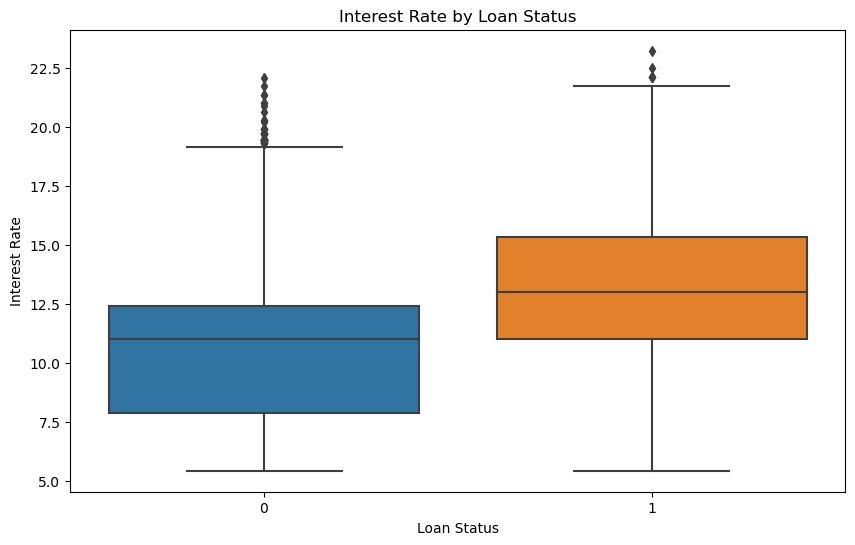

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

Loan Status 0:
Median Interest Rate: Approximately 12.5%
Interquartile Range (IQR): From around 10% to just over 15%
No outliers observed
Loan Status 1:
Median Interest Rate: Approximately 17.5%
IQR: Extends from roughly 15% to almost 20%
Several outliers above the upper whisker, indicating loans with significantly higher interest rates

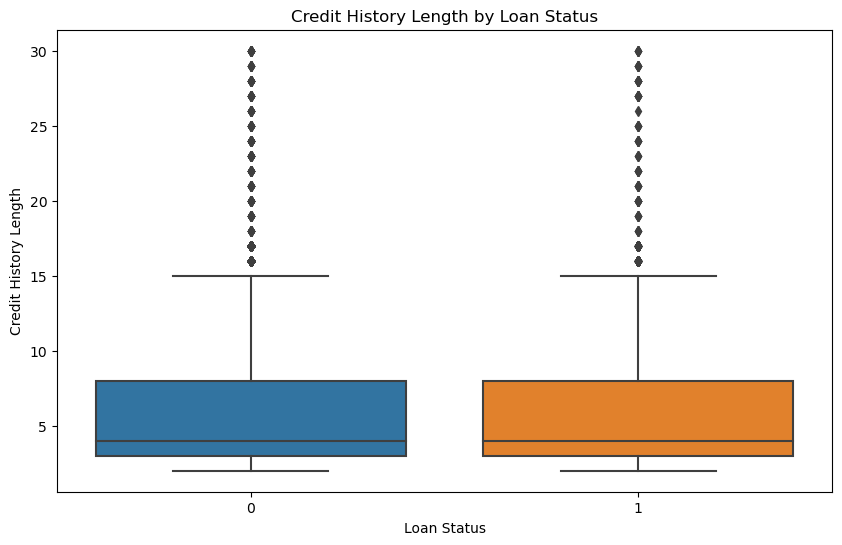

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df)
plt.title('Credit History Length by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit History Length')
plt.show()

Loan Status 0:
Median credit history length: Around 5 years
Interquartile range (IQR): Narrow, indicating little variability
Several outliers with credit history lengths up to nearly 30 years
Loan Status 1:
Median credit history length: Approximately 10 years
IQR: Wider than for loan status 0
Similar to loan status 0, there are outliers with credit history lengths extending up to nearly 30 years
In summary, loan status 1 tends to have longer credit histories, but both categories exhibit outliers with exceptionally lengthy credit histories

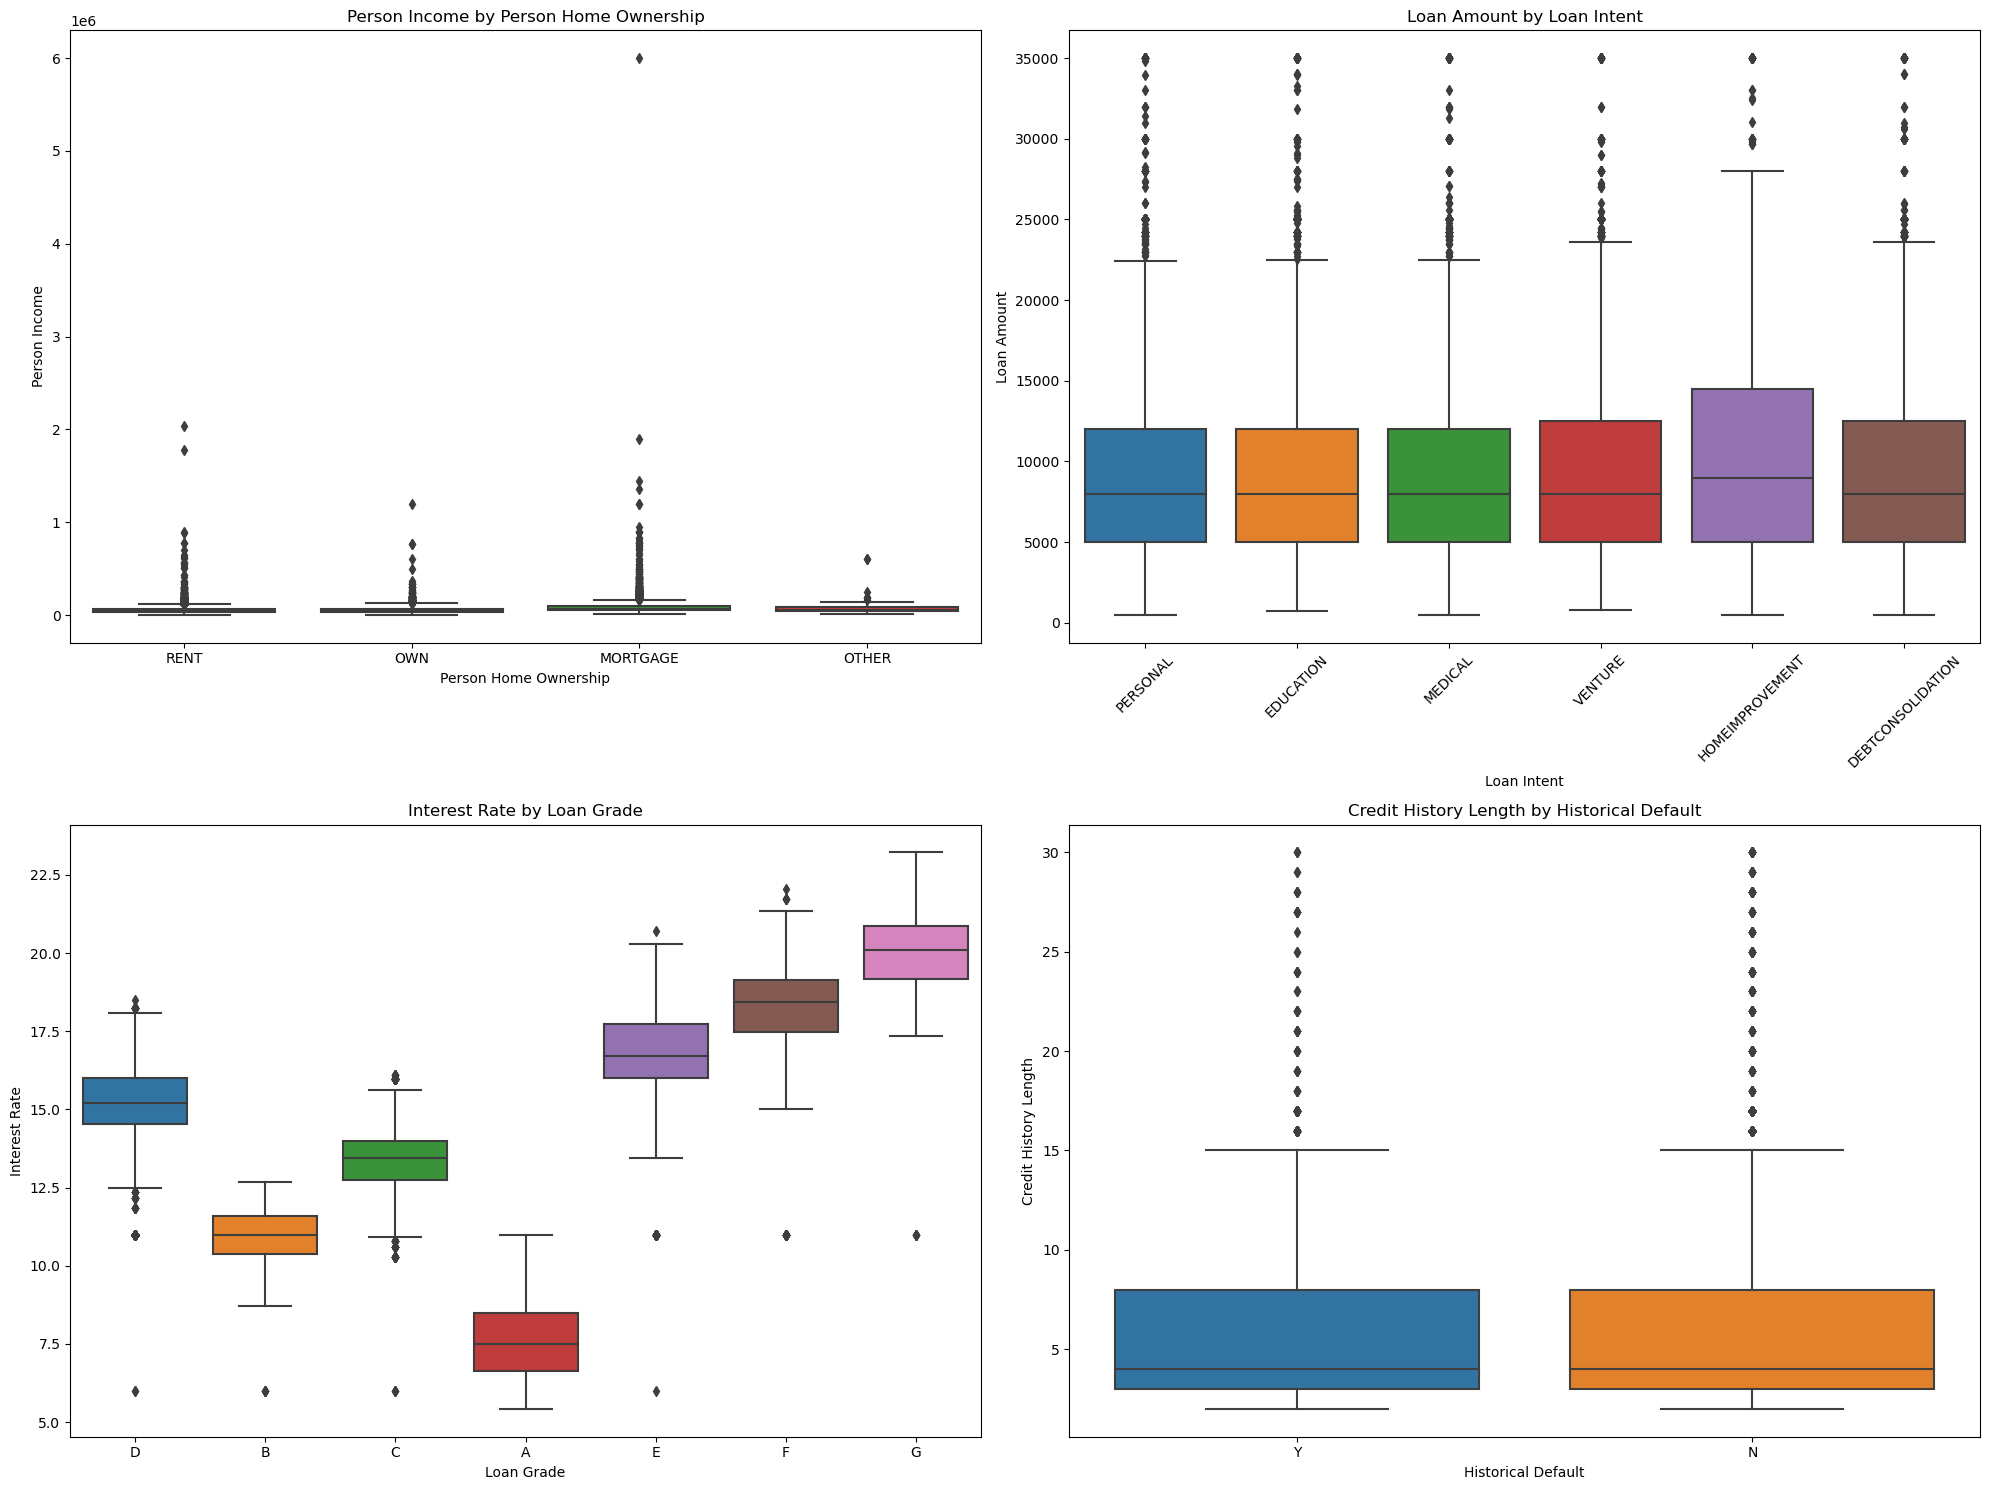

In [49]:
# Additional EDA on relationship between categorical and numerical columns with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.boxplot(ax=axes[0, 0], x='person_home_ownership', y='person_income', data=df)
axes[0, 0].set_title('Person Income by Person Home Ownership')
axes[0, 0].set_xlabel('Person Home Ownership')
axes[0, 0].set_ylabel('Person Income')

sns.boxplot(ax=axes[0, 1], x='loan_intent', y='loan_amnt', data=df)
axes[0, 1].set_title('Loan Amount by Loan Intent')
axes[0, 1].set_xlabel('Loan Intent')
axes[0, 1].set_ylabel('Loan Amount')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1, 0], x='loan_grade', y='loan_int_rate', data=df)
axes[1, 0].set_title('Interest Rate by Loan Grade')
axes[1, 0].set_xlabel('Loan Grade')
axes[1, 0].set_ylabel('Interest Rate')

sns.boxplot(ax=axes[1, 1], x='cb_person_default_on_file', y='cb_person_cred_hist_length', data=df)
axes[1, 1].set_title('Credit History Length by Historical Default')
axes[1, 1].set_xlabel('Historical Default')
axes[1, 1].set_ylabel('Credit History Length')

plt.tight_layout()
plt.show()

Person Income by Person Home Ownership:
This scatter plot displays the distribution of personal income based on different types of home ownership (RENT, OWN, MORTGAGE, and OTHER).
Notable observations:
Outliers exist in each category, particularly in RENT and MORTGAGE segments where some individuals have significantly higher incomes.
Loan Amount by Loan Intent:
A box plot showing loan amounts for various intents (DEBTCONSOLIDATION, EDUCATION, HOMEIMPROVEMENT, MEDICAL, PERSONAL, and VENTURE).
Key points:
Each colored box represents the interquartile range (IQR) of loan amounts.
Outliers are depicted as dots above and below the boxes.
Interest Rate by Loan Grade:
Another box plot, this time comparing interest rates across different loan grades (A to G).
Noteworthy:
Median interest rates vary among loan grades.
Outliers are visible.
Credit History Length by Historical Default:
A box plot comparing credit history length between those who historically defaulted (Y for Yes) and those who didn’t (N for No).
Takeaways:
A noticeable difference exists in median credit history length between the two groups.